In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group

from subgraph import YaleStarCatalog, StarDatabase
from utils import *


font_setting()
cmap = plt.get_cmap("ocean")

DPI = 100
FIG_SIZE = (12, 7)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
### probrem setting
# os
log_dir = "./log/obs_stars/"
seed = 100
# param
U = 1024
theta_FOV = 20

### compute params
seed_seq = np.random.SeedSequence(seed)
np_random = np.random.Generator(np.random.PCG64(seed_seq))
theta_res = np.arctan2(2 * np.tan(theta_FOV / 2), U)
epsilon = 2 * np.sqrt(2) * theta_res
theta_min = epsilon
theta_max = 2 * np.arctan(np.sqrt(2) * np.tan(theta_FOV / 2))

theta_FOV_list = [5, 10, 20, 40, 80]
M_lim_list = [3.5, 4.5, 5.5]
beta_list = [0.0, 0.2, 0.4, 0.6, 0.8]


----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
----- Star Database -----
the number of stars : 861
the range of magnitude : [-1.46, 4.49]
----- Star Database -----
the number of stars : 279
the range of magnitude : [-1.46, 3.49]


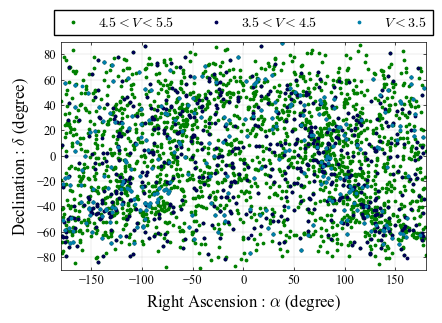

In [3]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# plot 
fig = plt.figure(figsize=(4.8, 3), dpi=100)
ax = fig.add_subplot(111)
s = 3
# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(0/3), "label": f"${lb}<V<{M_lim}$"}
ax.scatter((D_DB.get_RA() * 180 / np.pi+180)%360-180, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
lb = 3.5
M_lim = 4.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(1/3), "label": f"${lb}<V<{M_lim}$"}
ax.scatter((D_DB.get_RA() * 180 / np.pi+180)%360-180, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
M_lim = 3.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(2/3), "label": f"$V<{M_lim}$"}
ax.scatter((D_DB.get_RA() * 180 / np.pi+180)%360-180, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
ax.set_xlabel('Right Ascension : $\\alpha$ (degree)')
ax.set_ylabel('Declination : $\\delta$ (degree)')
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.legend(bbox_to_anchor=(0.5, 1.0), loc="lower center", ncol=4)

fig.savefig(f"{log_dir}/star_distribution.pdf", bbox_inches='tight')

----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
----- Star Database -----
the number of stars : 861
the range of magnitude : [-1.46, 4.49]
----- Star Database -----
the number of stars : 279
the range of magnitude : [-1.46, 3.49]


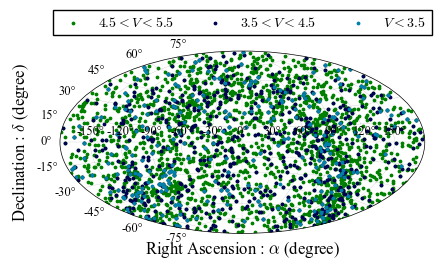

In [4]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# plot 
fig = plt.figure(figsize=(4.8, 3), dpi=100)
ax = fig.add_subplot(111, projection="aitoff")
s = 3
alpha=1.0
# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(0/3), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
ax.scatter((D_DB.get_RA() + np.pi) % (2 * np.pi) - np.pi, D_DB.get_DE(), **kwargs)
# 
lb = 3.5
M_lim = 4.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(1/3), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
ax.scatter((D_DB.get_RA() + np.pi) % (2 * np.pi) - np.pi, D_DB.get_DE(), **kwargs)
# 
M_lim = 3.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(2/3), "alpha": alpha, "label": f"$V<{M_lim}$"}
ax.scatter((D_DB.get_RA() + np.pi) % (2 * np.pi) - np.pi, D_DB.get_DE(), **kwargs)
# 
ax.set_xlabel('Right Ascension : $\\alpha$ (degree)')
ax.set_ylabel('Declination : $\\delta$ (degree)')
# ax.set_xlim(-180, 180)
# ax.set_ylim(-90, 90)
ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center", ncol=3)

fig.savefig(f"{log_dir}/star_distribution_aitoff.pdf", bbox_inches='tight')

----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
----- Star Database -----
the number of stars : 861
the range of magnitude : [-1.46, 4.49]
----- Star Database -----
the number of stars : 279
the range of magnitude : [-1.46, 3.49]


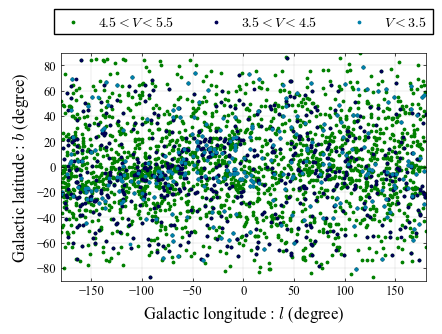

In [5]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# plot 
fig = plt.figure(figsize=(4.8, 3), dpi=100)
ax = fig.add_subplot(111)
s = 3
alpha=1.0
# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(0/3), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
ax.scatter((l * 180 / np.pi+180)%360-180, b * 180 / np.pi, **kwargs)
# 
lb = 3.5
M_lim = 4.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(1/3), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
ax.scatter((l * 180 / np.pi+180)%360-180, b * 180 / np.pi, **kwargs)
# # 
M_lim = 3.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(2/3), "alpha": alpha, "label": f"$V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
ax.scatter((l * 180 / np.pi+180)%360-180, b * 180 / np.pi, **kwargs)
# 
ax.set_xlabel('Galactic longitude : $l$ (degree)')
ax.set_ylabel('Galactic latitude : $b$ (degree)')
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center", ncol=3)

fig.savefig(f"{log_dir}/star_distribution_gala.pdf", bbox_inches='tight')

----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
----- Star Database -----
the number of stars : 861
the range of magnitude : [-1.46, 4.49]
----- Star Database -----
the number of stars : 279
the range of magnitude : [-1.46, 3.49]


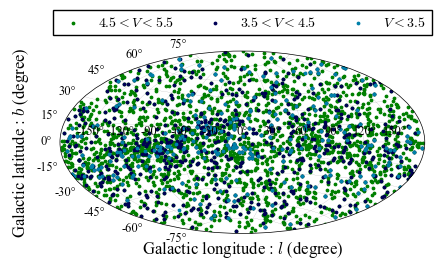

In [6]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# plot 
fig = plt.figure(figsize=(4.8, 3), dpi=100)
ax = fig.add_subplot(111, projection="aitoff")
s = 3
alpha=1.0
# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(0/3), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
ax.scatter(l, b, **kwargs)
# 
lb = 3.5
M_lim = 4.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(1/3), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
ax.scatter(l, b, **kwargs)
# # 
M_lim = 3.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(2/3), "alpha": alpha, "label": f"$V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
ax.scatter(l, b, **kwargs)
# 
ax.set_xlabel('Galactic longitude : $l$ (degree)')
ax.set_ylabel('Galactic latitude : $b$ (degree)')
# ax.set_xlim(-180, 180)
# ax.set_ylim(-90, 90)
ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center", ncol=3)

fig.savefig(f"{log_dir}/star_distribution_gala_aitoff.pdf", bbox_inches='tight')

In [7]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
N_milky = np.sum((-np.pi/6 < b)*(b < np.pi/6))
N_no_milky = np.sum((b < -np.pi/6)+(np.pi/6 < b))

r = 1.0
S_milky = 2*np.pi
S_no_milky = 2*np.pi

rho_milky = N_milky/S_milky
rho_no_milky = N_no_milky/S_no_milky

print(N_milky, N_no_milky)
print(rho_milky, rho_no_milky)

----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
1698 1010
270.2450933700383 160.7464925228143
